In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset from the csv file 
data = pd.read_csv('creditcard.csv')

In [22]:
# explore the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [23]:
# Print the shape of the data
print(data.shape)

(284807, 31)


In [24]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [25]:
# this dataset contains huge data so we are going to use only 30% od the data for the computation which is enough
data = data.sample(frac=0.3, random_state = 1)

In [26]:
print(data.shape)

(85442, 31)


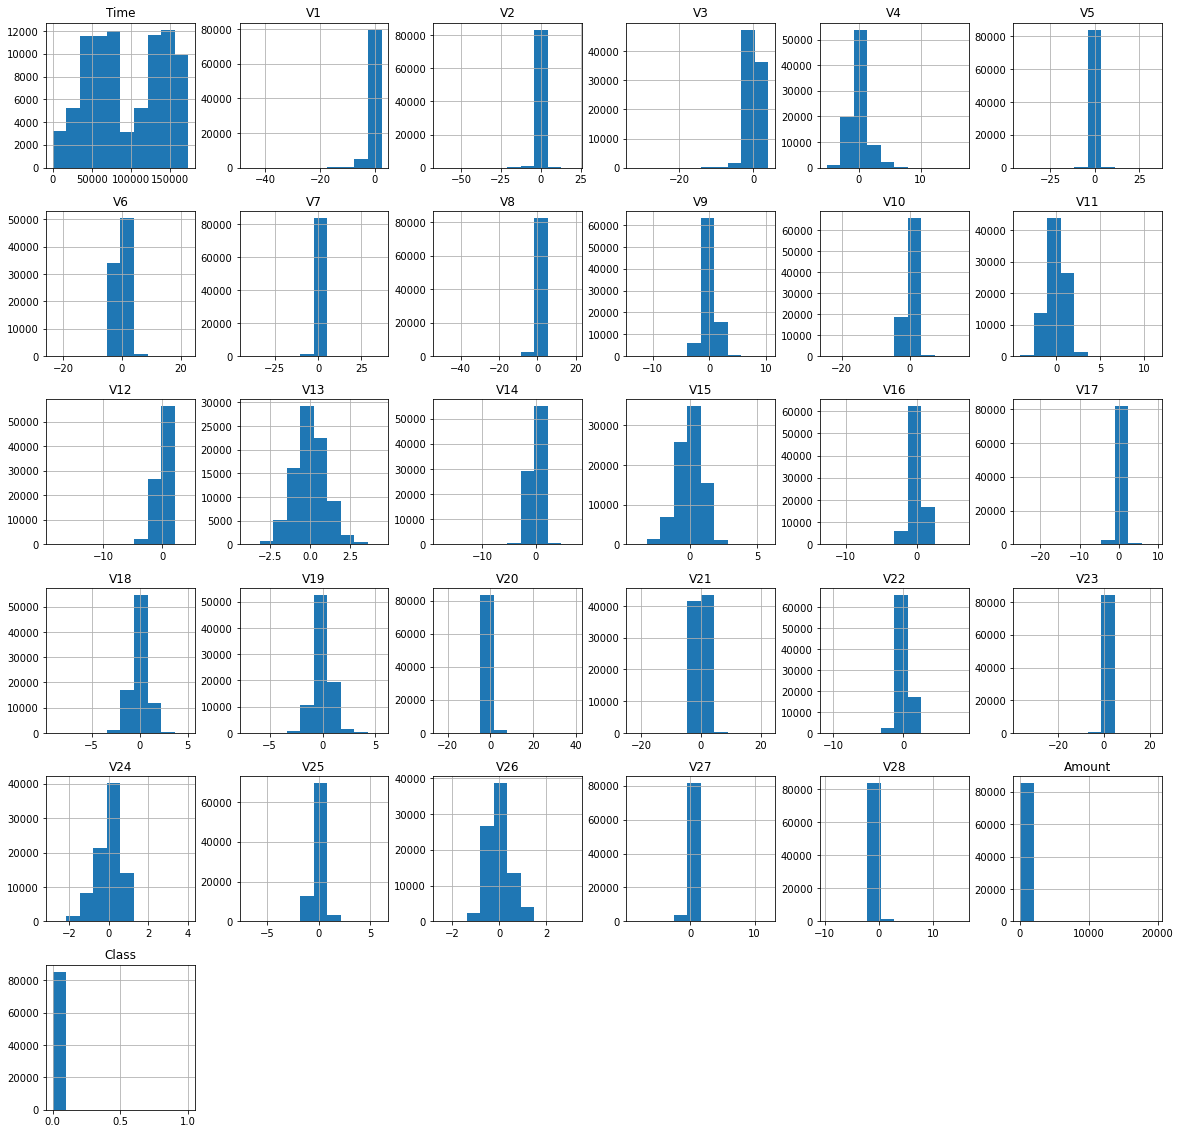

In [27]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [28]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

Text(0, 0.5, '')

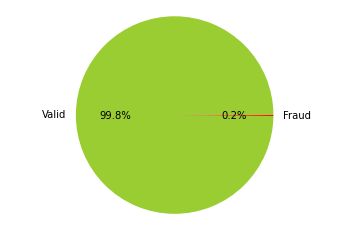

In [39]:
fig, ax = plt.subplots(1, 1)
ax.pie(data.Class.value_counts(),autopct='%1.1f%%', labels=['Valid','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [29]:
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.001582519605659559


In [30]:
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

Fraud Cases: 135
Valid Transactions: 85307


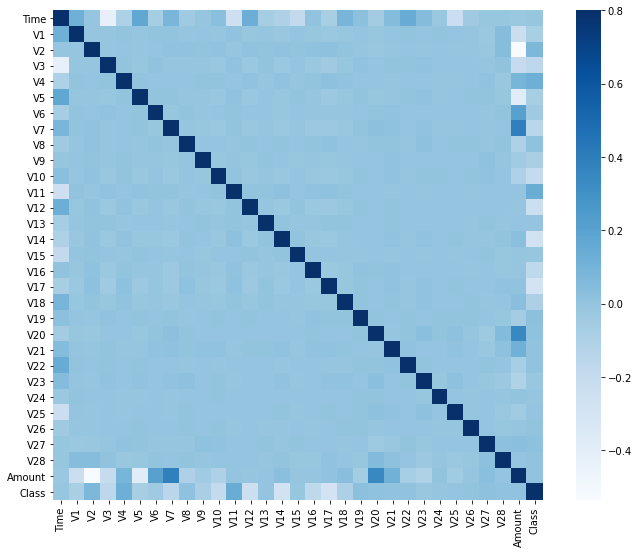

In [31]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, cmap="Blues")
plt.show()

In [32]:
# Get all the columns from the dataset
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(85442, 30)
(85442,)


# Applying Model

In [33]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [34]:
# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=40,
                                               contamination=outlier_fraction)
}

In [35]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

<Figure size 648x504 with 0 Axes>

In [38]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 193
0.9977411577444348
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.29      0.29      0.29       135

    accuracy                           1.00     85442
   macro avg       0.64      0.64      0.64     85442
weighted avg       1.00      1.00      1.00     85442

Local Outlier Factor: 267
0.9968750731490368
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.01      0.01      0.01       135

    accuracy                           1.00     85442
   macro avg       0.51      0.51      0.51     85442
weighted avg       1.00      1.00      1.00     85442

